# Starter code for the Outliers Mini-Project

In [1]:
import random
import pickle

import numpy as np
import matplotlib.pyplot as plt

## Load up some practice data with outliers in it

In [2]:
with open('practice_outliers_ages.pkl', 'rb') as f:
    ages = pickle.load(f)
    
with open('practice_outliers_net_worths.pkl', 'rb') as f:
    net_worths = pickle.load(f)

- ages and net_worths need to be reshaped into 2D numpy arrays
- second argument of reshape command is a tuple of integers: `(n_rows, n_columns)`
- by convention, `n_rows` is the number of data points
- and `n_columns` is the number of features

In [3]:
from sklearn.model_selection import train_test_split

ages = np.reshape(np.array(ages), (len(ages), 1))
net_worths = np.reshape(np.array(net_worths), (len(net_worths), 1))

ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

## ↓↓↓ Your Code Goes Here ↓↓↓

Fill in a regression here!  Name the regression object `reg` so that the plotting code below works, and you can see what your regression looks like

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ages_train,net_worths_train)
print(reg.coef_)
reg.score(ages_test,net_worths_test)

[[5.07793064]]


0.8782624703664672

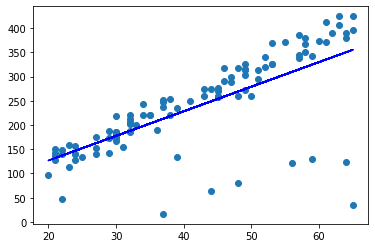

In [5]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

## Identify and remove the most outlier-y points

In [23]:
def outlier_cleaner(predictions, ages, net_worths):
    """Clean away the 10% of points that have the largest
    residual errors (difference between the prediction
    and the actual net worth).

    Return a list of tuples named cleaned_data where
    each tuple is of the form (age, net_worth, error).
    """
    cleaned_data = []
    num_10per_data = int(len(predictions)*0.9)
    error = (net_worths-predictions)**2

    for i in range(len(predictions)):
        tup = tuple((int(ages[i]),float(net_worths[i]),float(error[i])))
        cleaned_data.append(tup)
    cleaned_data = sorted(cleaned_data, key=lambda s: s[2])
    cleaned_data = cleaned_data[:num_10per_data]
    return cleaned_data

In [26]:
cleaned_data = []

try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlier_cleaner(predictions, ages_train, net_worths_train)
except NameError:
    print("Your regression object doesn't exist, or isn't name reg")
    print("Can't make predictions to use in identifying outliers")

**Only run this code if `cleaned_data` is returning data**

[[6.36859481]]


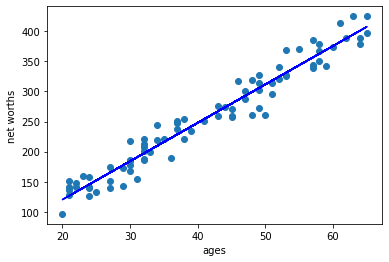

In [29]:
if cleaned_data:
    ages = []
    net_worths = []
    errors = []
    for data in cleaned_data:
        age,net_worth,error = data
        ages.append(age)
        net_worths.append(net_worth)
        errors.append(error)
    ages = np.reshape(np.array(ages), (len(ages), 1))
    net_worths = np.reshape(np.array(net_worths), (len(net_worths), 1))

    # Refit your cleaned data!

    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("you don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")

    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()
else:
    print("outlier_cleaner() is returning an empty list, no refitting to be done")

In [30]:
reg.score(ages_test,net_worths_test)

0.9831894553955322

## Enron Outliers

In [31]:
import sys
import pickle
import matplotlib.pyplot

sys.path.append("../utils/")

from feature_format import feature_format, target_feature_split

read in data dictionary, convert to numpy array

In [58]:
with open('../17-final-project/final_project_dataset.pkl', 'rb') as f:
    data_dict = pickle.load(f)
data_dict.pop('TOTAL')

features = ["salary", "bonus"]
data = feature_format(data_dict, features)

## ↓↓↓ Your Code Goes Here ↓↓↓

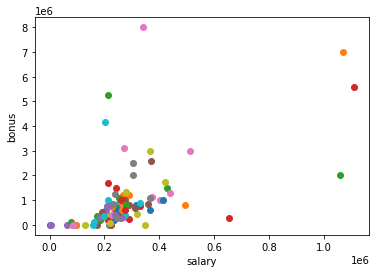

In [59]:
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [65]:
sorted_data = sorted(data, key=lambda x: x[1], reverse=True)[:5]

In [66]:
for key,value in data_dict.items():
    if data_dict[key]['bonus'] == sorted_data[1][1] or data_dict[key]['bonus']==sorted_data[2][1]:
        print(key)


LAY KENNETH L
SKILLING JEFFREY K
